#   Evaluating arrest data with Principal Components Analysis

* To better understand PCA we will go to another data set.

* Refers to arrest data in the states of the United States in 1973.

* Numbers are arrests per 100,000 except for the `UrbanPop' column which contains the percentage of the urban population.

In [1]:
import statsmodels.api as sm

us_arrests = sm.datasets.get_rdataset(dataname='USArrests', package='datasets')
print(us_arrests.data.shape)
us_arrests.data.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


* As we said, the PCA method is affected by differences in the variance of the data, so we will ensure that they have a mean of 0 and a variance of 1.

In [2]:
from sklearn.preprocessing import StandardScaler

X = us_arrests.data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

* We will look for two components.

In [3]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

* To see how much of the variation in the data is explained by these two components or dimensions:

In [4]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.62006039 0.24744129]
0.8675016829223337


* And let's see the components themselves:

In [5]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

* So the first component is:

$$z_1 = 0{,}53589947 \times x_1 + 0{,}58318363 \times x_2 + 0{,}27819087 \times x_3 + 0{,}54343209 \times x_4 $$

* And the second one:

$$z_2 = 0{,}41818087 \times x_1 + 0{,}1879856 \times x_2 - 0{,}87280619 \times x_3 - 0{,}16731864 \times x_4 $$

* Where: $x_1$ is `Murder`, $x_2$ is `Assault`, $x_3$ is `UrbanPop`, $x_4$ is `Rape`.

* One way to understand what the PCA method did is through a *biplot*.

* The chart plots our data in the dimensions we've found (now that it's two, we can).

* Also displays vectors showing how much the original features contribute to the components.

* The left and bottom axes are the main components.

* The right and upper axes show the contribution of each feature to the components, i.e. the loadings.

In [6]:
from math import ceil
import matplotlib.pyplot as plt

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
    
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)
    
    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)

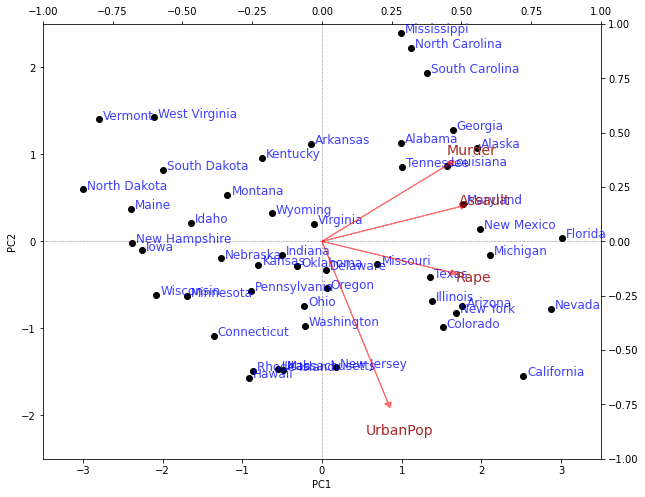

In [7]:
X_proj = pca.fit_transform(X)

biplot(X_proj,
       pca.components_.T,
       us_arrests.data.index,
       us_arrests.data.columns)

* We note, for example, that the feature `UrbanPop` contributes $0{,}27819087$ to the first component and $-0{,}87280619$ to the second.

* The loads of each component are called a *loading vector* (loading vector).

* Below we see each of the two vectors in a different column.

* Load vectors show us how each component is constructed from the original pre-existing dimensions and can help us interpret the components physically.

In [103]:
pca.components_.T

array([[ 0.53589947,  0.41818087],
       [ 0.58318363,  0.1879856 ],
       [ 0.27819087, -0.87280619],
       [ 0.54343209, -0.16731864]])